In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [2]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [52]:
ds2014 = ds.analysed_sst.sel(time = "2014")
ds2014.groupby(ds2014.time.dt.month).mean()

<xarray.DataArray 'analysed_sst' (month: 12, lat: 251, lon: 234)>
array([[[290.18948, 290.20535, 290.2189 , ..., 289.17844, 289.26727,
         289.32608],
        [290.19104, 290.18375, 290.18027, ..., 289.1765 , 289.24008,
         289.29105],
        [290.1543 , 290.16333, 290.16434, ..., 289.13773, 289.1636 ,
         289.20685],
        ...,
        [282.9017 , 282.90518, 282.91797, ...,       nan,       nan,
               nan],
        [282.81992, 282.84204, 282.87057, ...,       nan,       nan,
               nan],
        [282.70465, 282.75644, 282.80142, ...,       nan,       nan,
               nan]],

       [[289.86148, 289.864  , 289.8919 , ..., 289.18814, 289.21664,
         289.19516],
        [289.8365 , 289.85904, 289.86957, ..., 289.08188, 289.1395 ,
         289.13858],
        [289.8403 , 289.86545, 289.8559 , ..., 288.96826, 289.0377 ,
         289.06247],
...
        [286.80588, 286.83063, 286.84406, ...,       nan,       nan,
               nan],
        [286.80173, 286.8158 , 286.82956, ...,       nan,       nan,
               nan],
        [286.8034 , 286.81647, 286.82635, ...,       nan,       nan,
               nan]],

       [[292.08264, 292.09113, 292.12576, ..., 291.24356, 291.248  ,
         291.22827],
        [292.01773, 292.0177 , 292.0254 , ..., 291.21893, 291.20792,
         291.17975],
        [291.9591 , 291.96643, 291.98444, ..., 291.19882, 291.18936,
         291.19513],
        ...,
        [284.78323, 284.79126, 284.80832, ...,       nan,       nan,
               nan],
        [284.76566, 284.79745, 284.8266 , ...,       nan,       nan,
               nan],
        [284.81378, 284.8232 , 284.83585, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 33.0 33.06 33.12 33.18 ... 47.82 47.88 47.94 48.0
  * lon      (lon) float32 -132.0 -131.9 -131.9 -131.8 ... -118.1 -118.1 -118.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

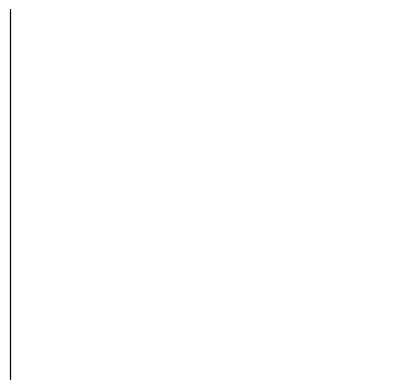

In [54]:
ds2014.groupby(ds2014.time.dt.month).mean().plot()

ax = plt.subplot(projection=crs)
ds2014.groupby(ds2014.time.dt.month).mean().plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
#ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))

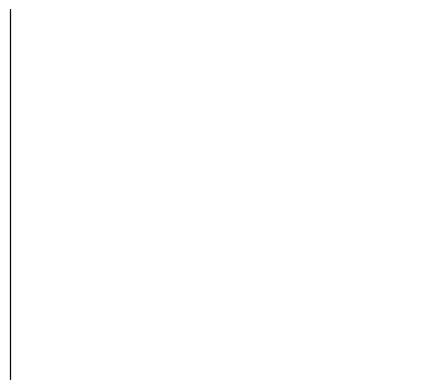

In [30]:
dat.groupby(dat.time.dt.month).mean().plot()

ax = plt.subplot(projection=crs)
dat.groupby(dat.time.dt.month).mean().plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
#ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))